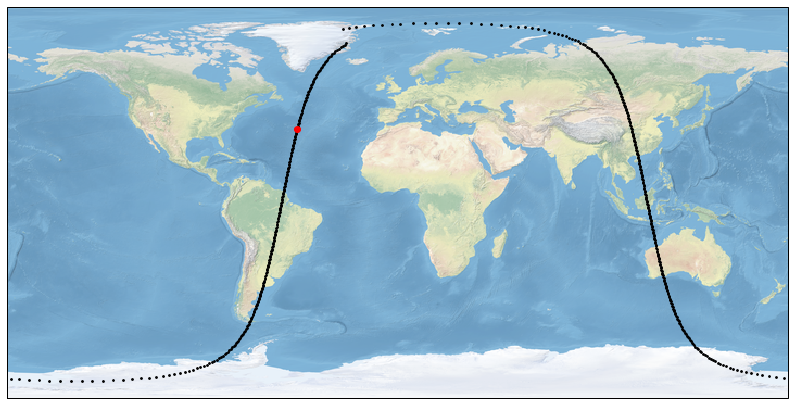

In [17]:
# SWIM SIGMA0 mini-profile visualisation notebook
#:author: Laura Hermozo
#:creation date: 24/03/2020

#This program is free software: you can redistribute it and/or modify it
#under the terms of the GNU Lesser General Public License as published by
#the Free Software Foundation, either version 3 of the License,
#or (at your option) any later version.

#This program is distributed in the hope that it will be useful,
#but WITHOUT ANY WARRANTY; without even the implied warranty of
#MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU Lesser
#General Public License for more details (http://www.gnu.org/licenses/).
#"""

########## warning : needs python with cartopy package  ##################

import numpy as np
import netCDF4 as netcdf
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

############################################################# arguments initilization :##########################################################
#SWIM L2 NetCDF file full path
SWIM_L2_NC_file_path='/work/ALT/swec/utilitaires/outils_quick_handbook/'
#SWIM L2 NetCDF file full name
SWIM_L2_NC_file_name='CFO_OPER_SWI_L2_____F_20200120T102427_20200120T115712.nc'

#SWIM box number for sigma0 mini_profile visualization
num_box=60

#side of the nadir track to analyse (0 : right side ; 1 :left side)
nadir_side=0

#azimuth bin number for sigma0 mini_profile visualization (<12)
num_azimuth_bin=10
####################################################### ground track and box position visualization #############################################

#NetCDF file opening and reading
cdf=netcdf.Dataset(SWIM_L2_NC_file_path+SWIM_L2_NC_file_name)

# Plot the nadir point for all boxes along the satellite track (Black points)
# plot the selected box localization (red point)
try:
    lat = cdf.variables['lat_nadir_l2'][:]
    lon = cdf.variables['lon_nadir_l2'][:]
except Exception:
    self.logger.error('Nadir coordinates of boxes unavailable. Using lon_l2, lat_l2 for posneg=0 to plot trace instead.')
finally:
    lat = cdf.variables['lat_l2'][0,:]
    lon = cdf.variables['lon_l2'][0,:]
plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.stock_img()
ax.set_global()      
ax.scatter(lon, lat, s=3, c='k', marker='o')          
h = ax.plot(lon[num_box],lat[num_box],marker='o', c='r')



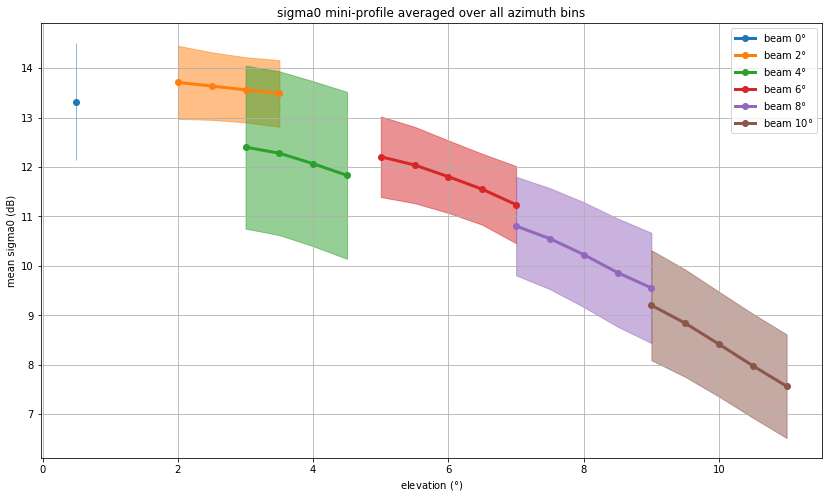

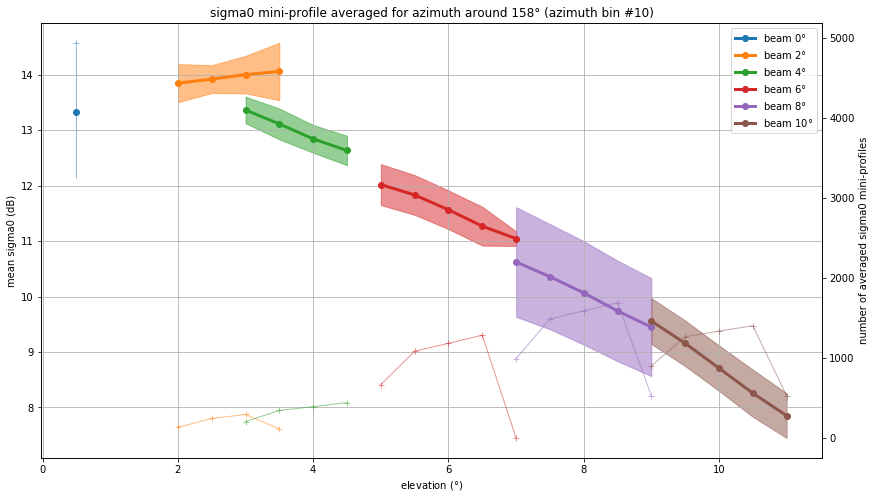

In [2]:
################################################################### Sigma0 mini-profile visualization ######################################################


# get elevation ticks
theta_ticks_mini_profile = np.array([float(i) for i in cdf.theta_ticks_mini_profile.split(';')[:-1]])

# get azimuth sampling 
phi_ticks = cdf.variables['phi_vector']

# get beam sampling 
n_beam_sig0 = cdf.dimensions['n_beam_sig0'].size

# get beam elevation angles
beam_angle = cdf.macrocycle_angle.split(';')

# plot sigma 0 over all azimuth bins
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
for beam_sig0 in range(n_beam_sig0):
    x = int(beam_angle[beam_sig0])+theta_ticks_mini_profile
    y = cdf.variables['sigma0_mini_profile_all_azim_cor'][:,nadir_side,num_box,beam_sig0]
    sy = cdf.variables['sigma0_std_mini_profile_all_azim_cor'][:,nadir_side,num_box,beam_sig0]
    line = ax.plot(x,y,
                 ls='-',marker='o',lw=3,
                   label='beam '+beam_angle[beam_sig0]+'$\degree$')
    c = line[0].get_color()
    ax.fill_between(x,y+sy,y2=y-sy,color=c,alpha=0.5)

ax.grid(True)
ax.set_xlabel('elevation ($\degree$)')
ax.set_ylabel('mean sigma0 (dB)')
plt.title('sigma0 mini-profile averaged over all azimuth bins')
plt.legend(loc='best')


# plot sigma 0 over a given azimuth bin
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax2=ax.twinx()
for beam_sig0 in range(n_beam_sig0):
    x = int(beam_angle[beam_sig0])+theta_ticks_mini_profile
    y = cdf.variables['sigma0_mini_profile'][:,num_azimuth_bin,nadir_side,num_box,beam_sig0]
    sy = cdf.variables['sigma0std_mini_profile'][:,num_azimuth_bin,nadir_side,num_box,beam_sig0]
    line = ax.plot(x,y,
                 ls='-',marker='o',lw=3,
                   label='beam '+beam_angle[beam_sig0]+'$\degree$')
    c = line[0].get_color()
    ax.fill_between(x,y+sy,y2=y-sy,color=c,alpha=0.5)
    
    # plot number of averaged sigma0 profiles in box num_box, and side nadir_side
    y2 = cdf.variables['sigma0N_mini_profile'][:,num_azimuth_bin,nadir_side,num_box,beam_sig0]
    ax2.plot(x,y2,c=c,ls='-',marker='+',lw=1,alpha=0.5)
    

ax.grid(True)
ax.set_xlabel('elevation ($\degree$)')
ax.set_ylabel('mean sigma0 (dB)')
ax2.set_ylabel('number of averaged sigma0 mini-profiles')
plt.title('sigma0 mini-profile averaged for azimuth around %3.0f° (azimuth bin #%i)'%(phi_ticks[num_azimuth_bin],num_azimuth_bin))
ax.legend(loc='best')